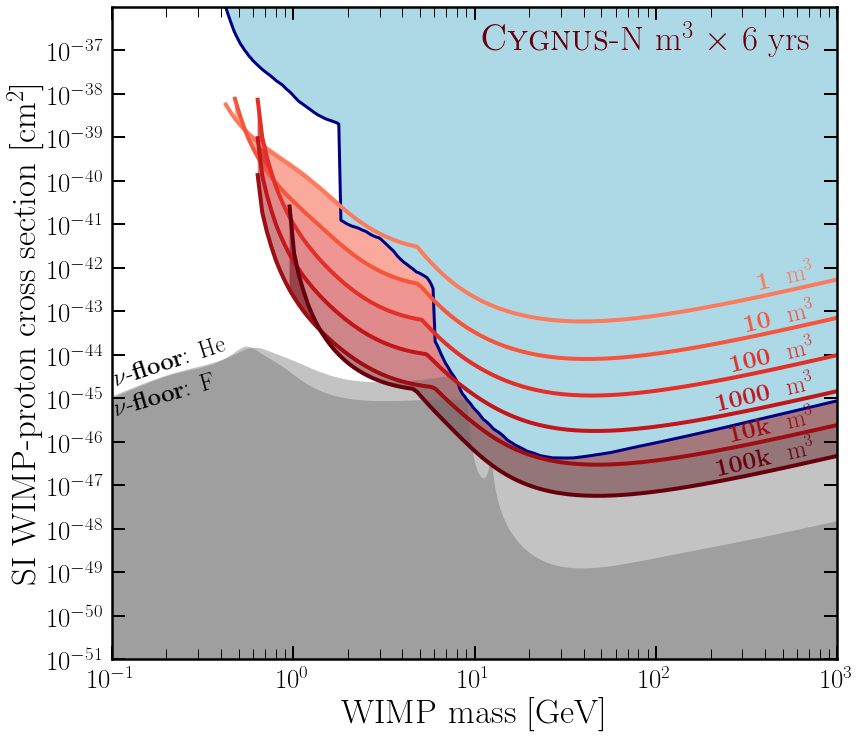

In [79]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams['axes.linewidth'] = 2.5
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xmin = 0.1
xmax = 1.0e3
ymax = 1.0e-36
ymin = 1.0e-51

nu_Xe = loadtxt("../data/WIMPLimits/SI/nufloor-Xe.txt")
nu_F = loadtxt("../data/WIMPLimits/SI/nufloor-F.txt")
nu_He = loadtxt("../data/WIMPLimits/SI/nuFloorSimple-He.txt")
plt.text(0.1,1.7e-45,r"$\nu$-{\bf floor}: F",fontsize=24,rotation=16,color="k")
plt.text(0.1,1.2e-44,r"$\nu$-{\bf floor}: He",fontsize=24,rotation=18,color="k")
plt.fill_between(nu_F[:,0], nu_F[:,1], y2=ymin,facecolor='dimgrey',alpha=0.4)
plt.fill_between(nu_He[0,:], nu_He[1,:], y2=ymin,facecolor='dimgrey',alpha=0.4)


# Expt limits
AllLimits = loadtxt("../data/WIMPLimits/SI/AllLimits-2018.txt")
plt.fill_between(AllLimits[:,0], AllLimits[:,1],edgecolor=None,y2=ymax,facecolor='lightblue')
plt.plot(AllLimits[:,0], AllLimits[:,1],color='navy',linewidth=3)



cols = (cm.Reds(linspace(0,1,10)))
ist = 4

labs = array(['1','10','100','1000','10k','100k'])

CYGNUS = loadtxt("../data/CYGNUS10-timeline.txt")
m = logspace(-1,4.0,200)
for i in range(0,6):
    sig1 = CYGNUS[i,6:]/1.2
    sig1[sig1==0.0] = nan
    plt.plot(m,sig1,color=cols[i+ist,:],linewidth=4)
    plt.text(m[155],sig1[155]*3.5,r'{\bf '+labs[i]+r' } m$^3$',color=cols[i+ist,:],fontsize=25,rotation=13
            ,horizontalalignment='right',verticalalignment='top')

sig0 = CYGNUS[0,6:]
sig0[sig0==0.0] = nan
for i in range(1,6):
    sig1 = CYGNUS[i,6:]/1.2
    sig1[sig1==0.0] = nan
    plt.fill_between(m,sig1,y2=sig0,facecolor=cols[i+ist,:],alpha=0.5,linewidth=4,zorder=0)
    sig0 = sig1

plt.gcf().text(0.52,0.83,r'\textsc{Cygnus}-N m$^3$ $\times$ 6 yrs',fontsize=35,color=cols[-1,:])

# Labels
plt.xlabel(r"WIMP mass [GeV]",fontsize=35)
plt.ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)

#leg1 = ax.legend(fontsize=27,frameon=True,loc="lower left",framealpha=0.5,ncol=2,columnspacing=0.5)
#leg1.get_frame().set_linewidth(3)
#leg1.get_frame().set_edgecolor("k")

# Style
plt.yscale('log')
plt.xscale('log')
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)
plt.xticks(fontsize=27)
plt.yticks(10.0**arange(log10(ymin),log10(ymax),1),fontsize=27)
ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
plt.show()
fig.savefig('../plots/CYGNUS-timeline.pdf',bbox_inches='tight')
